In [64]:
from schema import *
import matplotlib.pyplot as plt
import networkx as nx
from typing import List, Dict, Tuple, Any

In [65]:
environment: EnvironmentModel = EnvironmentModel(
    width=5, height=5, n_survivors=1, n_agents=1, n_save_zones=1, seed=None
)

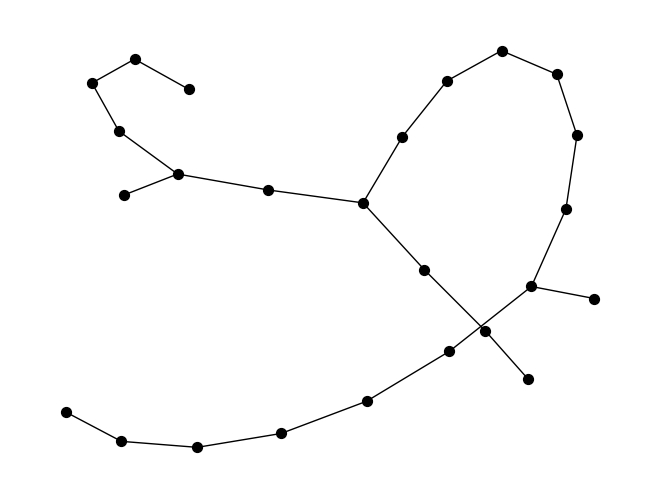

In [63]:
tiles: List[Tile] = Tile.transform_dict_to_tiles(environment.maze)

# for t in tiles:
    # print("Tile: xy", t.x, t.y, t.walls)

G: nx.Graph = Tile.transform_tiles_to_graph(tiles)

nx.draw(G, with_labels=False, node_size=50, node_color="black", font_size=8, font_color="white")
plt.show()